# Heatmaps

This notebook demonstrates how to create heatmaps.

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import gpplotting
import seaborn as sns
import numpy as np

In [4]:
#We'll use this example dataset
flights = sns.load_dataset('flights')

In [5]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [6]:
'''We want to create a heatmap with year on the y-axis, month on the x-axis, 
and #passengers as the value being plotted. This requires us to pivot the table 
with the format '(y axis, x-axis, value)'''
flights = flights.pivot('year', 'month', 'passengers')

In [7]:
#We pivoted the data set to reflect the axes of our heatmap
flights.head()

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


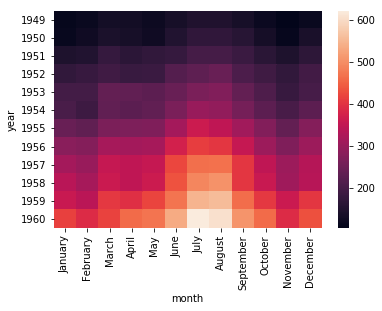

In [8]:
ax = sns.heatmap(flights)

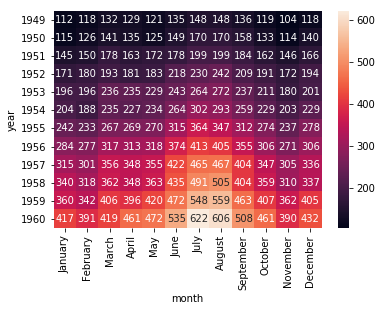

In [9]:
'''We can annotate each value of the heatmap. This would be useful for 
displaying correlations. fmtstring, optional: String formatting code to use when adding annotations.'''
ax = sns.heatmap(flights, annot=True, fmt = 'd')

Sequential colorscheme

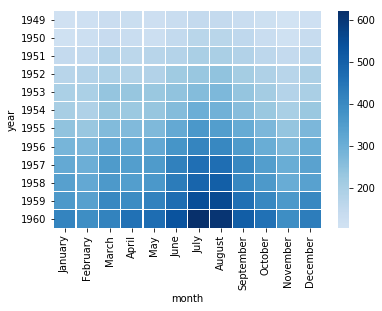

In [10]:
#Plot with a sequential colorscheme centered at a specific value (x,y)
ax = sns.heatmap(flights, cmap = 'Blues', center = flights.loc[1954, "July"], linewidths = 0.1)

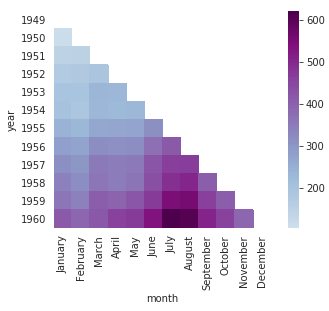

In [11]:
#Plot with a sequential colorscheme and add a mask to show only part of heatmap
mask = np.zeros_like(flights)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    ax = sns.heatmap(flights, cmap = 'BuPu', center = flights.loc[1954, "July"], mask=mask, square = True)
        

Diverging palette


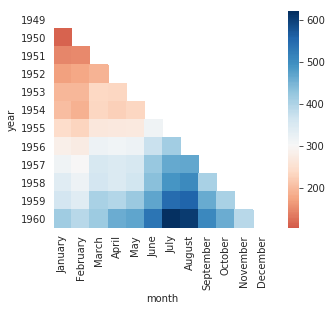

In [40]:
#Plot with a sequential colorscheme and add a mask to show only part of heatmap
mask = np.zeros_like(flights)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    ax = sns.heatmap(flights, cmap = 'RdBu', center = flights.loc[1954, "July"], mask=mask, square = True)
        

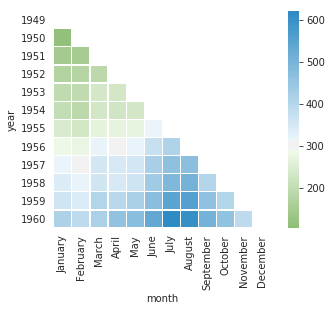

In [77]:
#Custom diverging plot More info here: https://seaborn.pydata.org/generated/seaborn.diverging_palette.html
palette = sns.diverging_palette(120, 240, s=90, l=55, n=7, as_cmap = True, center = 'light')
mask = np.zeros_like(flights)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    ax = sns.heatmap(flights, cmap = palette, center = flights.loc[1954, "July"], mask=mask, square = True, linewidth = 0.2)
        